<a href="https://colab.research.google.com/github/zharfanw/zhar_hfss_pyhelper/blob/main/BigPLusAirgap_DataDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# METASURFACES DESIGN Based on BIG PLUS 4 Layers with Airgap(1mm)

## Unit cell Metasurface Design

Unit Cell design

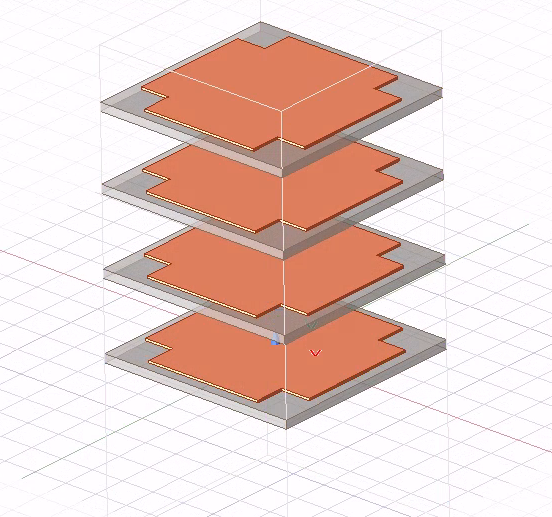

Label for Parameter

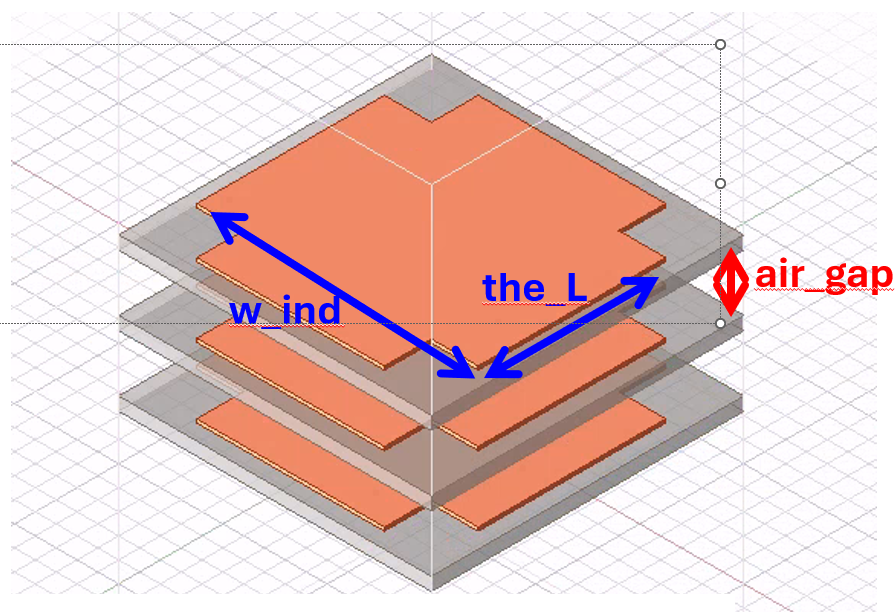

In [1]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [2]:
path_analysis='/content/drive/MyDrive/MyNotebook/AntennaAnalysis/'

## Unit Cell Sweep Dimension Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
phase_dat = pd.read_csv(path_analysis + 'phaseDeg_5layerbigplusairgp.csv')
phase_dat

,w_ind[mm],the_L[mm],cang_deg_val(S(FloquetPort2:1,FloquetPort1:1))
0,0.2,0.2,37.9380,NaN
1,0.4,0.2,35.9768,NaN
2,0.6,0.2,34.6676,NaN
3,0.8,0.2,31.2390,NaN
4,1.0,0.2,26.4694,NaN
...,...,...,...,...
248,1.4,2.4,-152.9240,NaN
249,1.6,2.4,-167.8690,NaN
250,1.8,2.4,-177.8820,NaN
251,2.0,2.4,-186.6370,NaN


In [5]:
current_columns = phase_dat.columns

# Get the name of the third column (index 2)
third_col_name = current_columns[2]

# Rename the third column to 'phasedeg'
# The fourth column will not be dropped this time.
phase_dat = phase_dat.rename(columns={third_col_name: 'phasedeg'})

print("Updated phase_dat DataFrame head:")
phase_dat.head()

Updated phase_dat DataFrame head:


,w_ind[mm],the_L[mm],phasedeg,FloquetPort1:1))
0,0.2,0.2,37.9380,NaN
1,0.4,0.2,35.9768,NaN
2,0.6,0.2,34.6676,NaN
3,0.8,0.2,31.2390,NaN
4,1.0,0.2,26.4694,NaN


### Visualize Gain S21 on Variance Frequency

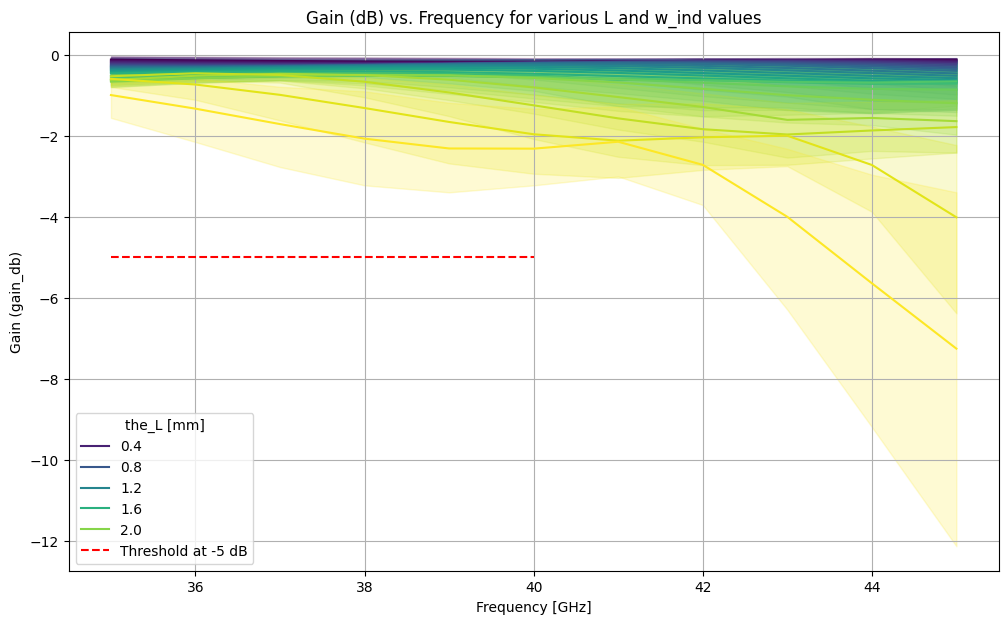

In [37]:
# Create the plot: Gain vs. Frequency
plt.figure(figsize=(12, 7))
sns.lineplot(x='Freq [GHz]', y='gain_db', data=gain_dat, hue='the_L [mm]', palette='viridis')
plt.title('Gain (dB) vs. Frequency for various L and w_ind values')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Gain (gain_db)')
plt.grid(True)

# Add a horizontal line at y = -5 from Freq 35 to 40
plt.hlines(-5, 35, 40, colors='red', linestyles='dashed', label='Threshold at -5 dB')

plt.legend(title='the_L [mm]')
plt.show()

### Visualize Phase-Deg on Frequency

Visualization Phase degree on all frequency. It is good design, because each design have consistent gradient of degree

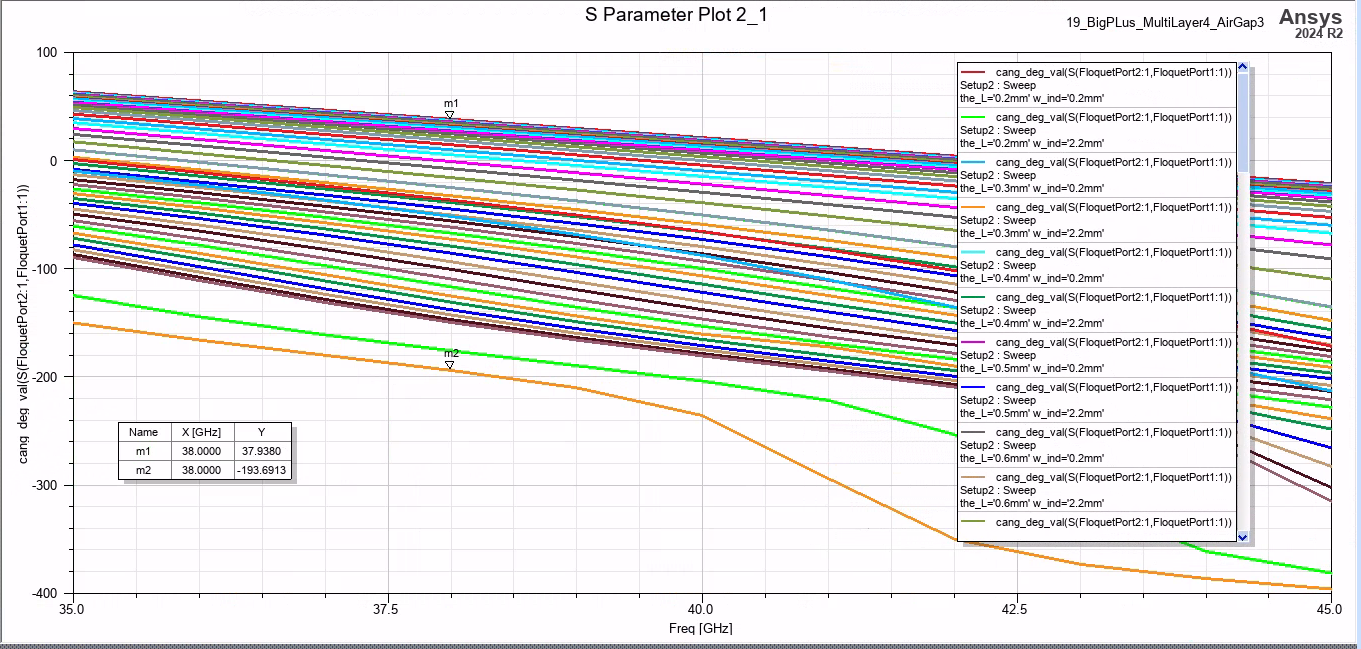

### Various Unit-cell design **at 38GHz**

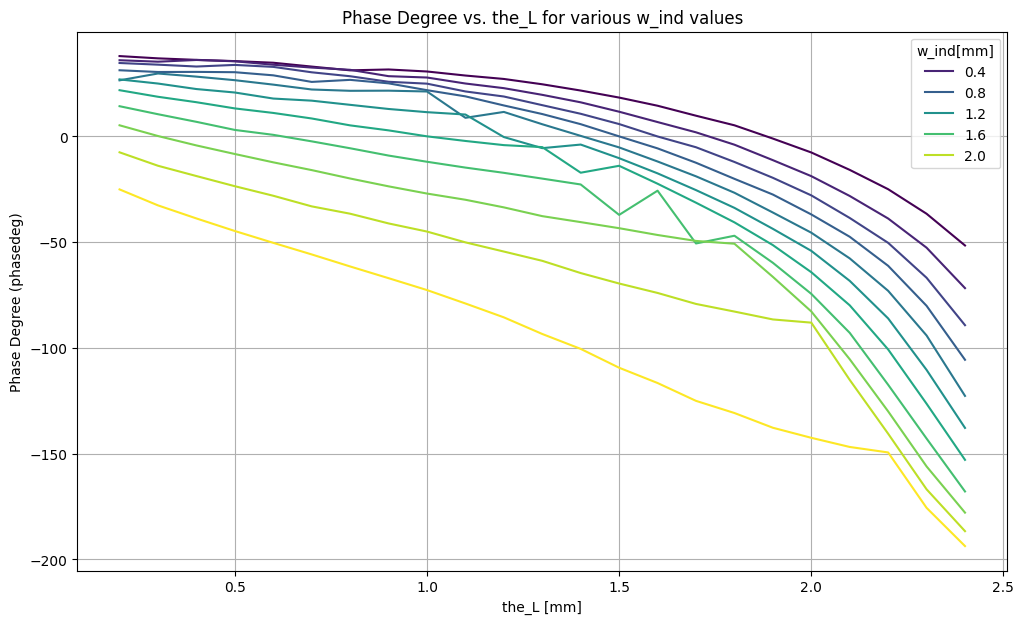

In [6]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='the_L[mm]', y='phasedeg', data=phase_dat, hue='w_ind[mm]', palette='viridis')
plt.title('Phase Degree vs. the_L for various w_ind values')
plt.xlabel('the_L [mm]')
plt.ylabel('Phase Degree (phasedeg)')
plt.grid(True)
plt.legend(title='w_ind[mm]')
plt.show()

The plot above shows how **phasedeg** changes as **the_L [mm]** varies. Each colored line represents a different **w_ind [mm]** value, allowing us to observe the phasedeg trend across various combinations of **the_L [mm]** and **w_ind [mm]**.


In [7]:
gain_dat = pd.read_csv(path_analysis + 'dbgain_5layerbigplusairgp.csv')
gain_dat

,the_L [mm],w_ind [mm],Freq [GHz],"dB(S(FloquetPort2:1,FloquetPort1:1)) []"
0,0.2,0.2,35,-0.009046
1,0.2,0.2,36,-0.011646
2,0.2,0.2,37,-0.014564
3,0.2,0.2,38,-0.017699
4,0.2,0.2,39,-0.020941
...,...,...,...,...
2778,2.4,2.2,41,-0.373378
2779,2.4,2.2,42,-6.374815
2780,2.4,2.2,43,-12.731352
2781,2.4,2.2,44,-17.798582


In [8]:
# Get the current name of the fourth column in gain_dat
current_gain_col_name = gain_dat.columns[3]

# Rename the fourth column to 'gain_db'
gain_dat = gain_dat.rename(columns={current_gain_col_name: 'gain_db'})

print("Updated gain_dat DataFrame head:")
display(gain_dat.head())

Updated gain_dat DataFrame head:


,the_L [mm],w_ind [mm],Freq [GHz],gain_db
0,0.2,0.2,35,-0.009046
1,0.2,0.2,36,-0.011646
2,0.2,0.2,37,-0.014564
3,0.2,0.2,38,-0.017699
4,0.2,0.2,39,-0.020941


Updated phase_dat DataFrame head after conditional subtraction:


,w_ind[mm],the_L[mm],phasedeg,FloquetPort1:1))
0,0.2,0.2,-322.0620,NaN
1,0.4,0.2,-324.0232,NaN
2,0.6,0.2,-325.3324,NaN
3,0.8,0.2,-328.7610,NaN
4,1.0,0.2,-333.5306,NaN


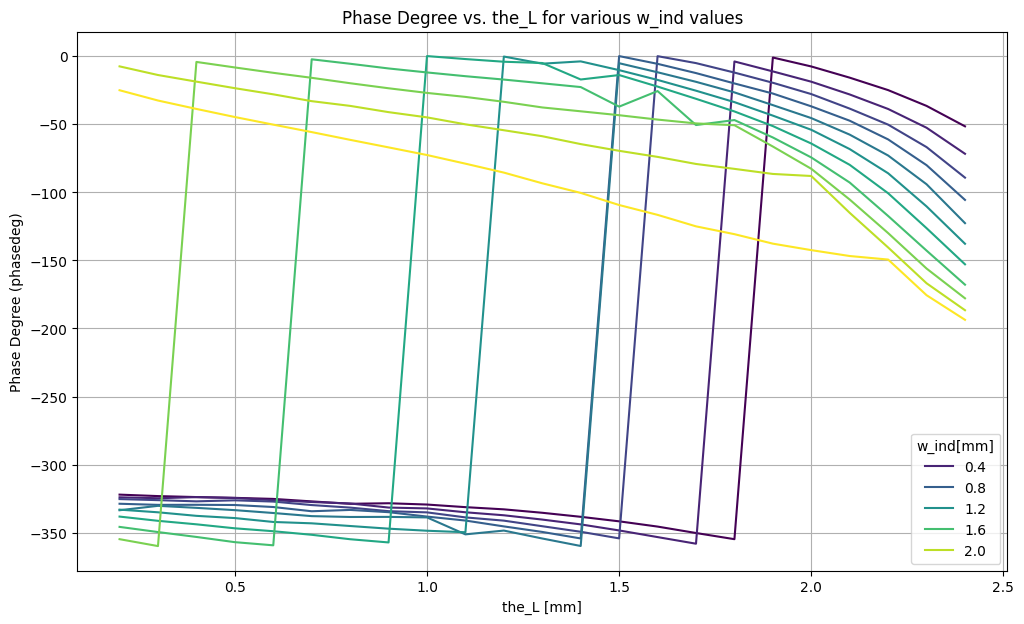

In [10]:
# Identify groups (the_L[mm], w_ind[mm]) that contain at least one positive phasedeg
has_positive_phasedeg_in_group = phase_dat.groupby(['the_L[mm]', 'w_ind[mm]'])['phasedeg'].transform(lambda x: (x > 0).any())

# Apply the condition: if the group has positive phasedeg AND the current phasedeg is positive
condition_to_subtract = (has_positive_phasedeg_in_group) & (phase_dat['phasedeg'] > 0)

# Subtract 360 from phasedeg for rows meeting the condition
phase_dat.loc[condition_to_subtract, 'phasedeg'] = phase_dat.loc[condition_to_subtract, 'phasedeg'] - 360

print("Updated phase_dat DataFrame head after conditional subtraction:")
display(phase_dat.head())

plt.figure(figsize=(12, 7))
sns.lineplot(x='the_L[mm]', y='phasedeg', data=phase_dat, hue='w_ind[mm]', palette='viridis')
plt.title('Phase Degree vs. the_L for various w_ind values')
plt.xlabel('the_L [mm]')
plt.ylabel('Phase Degree (phasedeg)')
plt.grid(True)
plt.legend(title='w_ind[mm]')
plt.show()

In [11]:
import numpy as np

# Sort the DataFrame by 'w_ind[mm]' and 'the_L[mm]' to ensure correct unwrapping order
phase_dat_sorted = phase_dat.sort_values(by=['w_ind[mm]', 'the_L[mm]'])

# Apply np.unwrap to 'phasedeg' for each 'w_ind[mm]' group
# np.unwrap expects radians, so convert degrees to radians, unwrap, then convert back to degrees
phase_dat_sorted['phasedeg_unwrapped'] = phase_dat_sorted.groupby('w_ind[mm]')['phasedeg'].transform(lambda x: np.degrees(np.unwrap(np.radians(x))))

print("Updated phase_dat DataFrame head with unwrapped phase:")
display(phase_dat_sorted.head())

Updated phase_dat DataFrame head with unwrapped phase:


,w_ind[mm],the_L[mm],phasedeg,FloquetPort1:1)),phasedeg_unwrapped
0,0.2,0.2,-322.0620,NaN,-322.0620
11,0.2,0.3,-323.1361,NaN,-323.1361
22,0.2,0.4,-323.8551,NaN,-323.8551
33,0.2,0.5,-324.4342,NaN,-324.4342
44,0.2,0.6,-325.2083,NaN,-325.2083


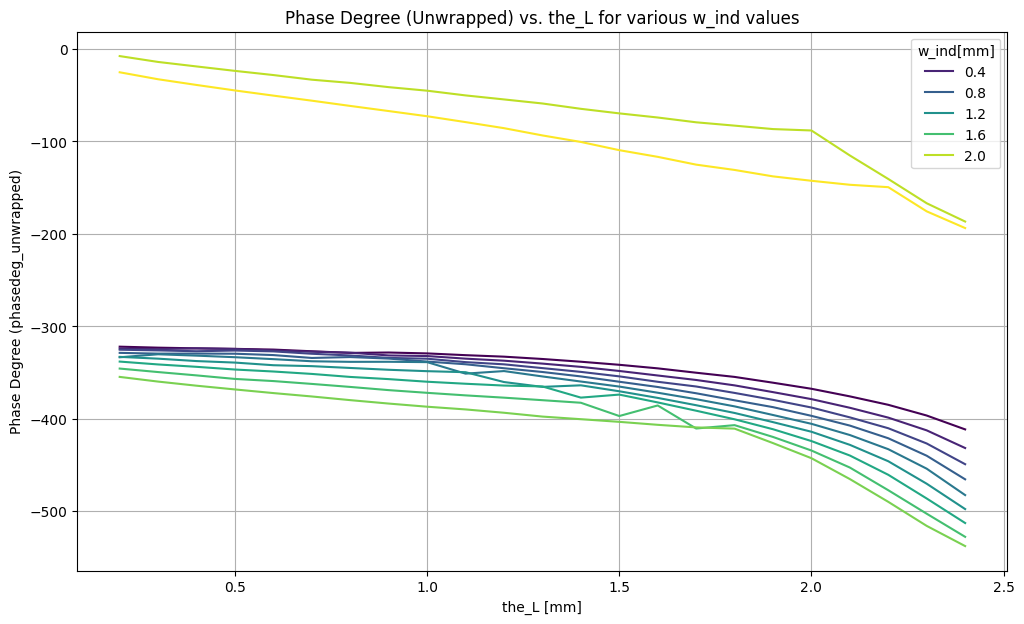

In [12]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='the_L[mm]', y='phasedeg_unwrapped', data=phase_dat_sorted, hue='w_ind[mm]', palette='viridis')
plt.title('Phase Degree (Unwrapped) vs. the_L for various w_ind values')
plt.xlabel('the_L [mm]')
plt.ylabel('Phase Degree (phasedeg_unwrapped)')
plt.grid(True)
plt.legend(title='w_ind[mm]')
plt.show()

### Visualize Shifted Selected Unit-Cell design **at 38GHz**

In [13]:
import plotly.express as px

# Create an interactive line plot using Plotly Express
fig_interactive = px.line(
    phase_dat_sorted,
    x='the_L[mm]',
    y='phasedeg_unwrapped',
    color='w_ind[mm]',
    title='Interactive Phase Degree (Unwrapped) vs. the_L for various w_ind values',
    labels={'the_L[mm]': 'the_L [mm]', 'phasedeg_unwrapped': 'Phase Degree (phasedeg_unwrapped)', 'w_ind[mm]': 'w_ind[mm]'}
)

# Update layout for better readability (optional)
fig_interactive.update_layout(xaxis_title='the_L [mm]', yaxis_title='Phase Degree (phasedeg_unwrapped)', legend_title='w_ind[mm]')

# Show the interactive plot
fig_interactive.show()

The plot above shows the unwrapped **phasedeg** versus **the_L [mm]**. By applying the unwrapping function, we can observe a smoother phase trend without sudden jumps, which is more representative of continuous phase variation.


In [38]:
phase_diff = -322.062 + 193.691
phase_diff

-128.371

In [34]:
# Define the target range
min_val = -360
max_val = 0
range_size = max_val - min_val

# Apply the wrapping formula
# wrapped_x = min_val + (x - min_val) % range_size
phase_dat_sorted['phasedeg_wrapped'] = min_val + (phase_dat_sorted['phasedeg_unwrapped'] - min_val) % range_size

print("Updated phase_dat_sorted DataFrame head with wrapped phase:")
display(phase_dat_sorted.head())

Updated phase_dat_sorted DataFrame head with wrapped phase:


,w_ind[mm],the_L[mm],phasedeg,FloquetPort1:1)),phasedeg_unwrapped,phasedeg_wrapped
0,0.2,0.2,-322.0620,NaN,-322.0620,-322.0620
11,0.2,0.3,-323.1361,NaN,-323.1361,-323.1361
22,0.2,0.4,-323.8551,NaN,-323.8551,-323.8551
33,0.2,0.5,-324.4342,NaN,-324.4342,-324.4342
44,0.2,0.6,-325.2083,NaN,-325.2083,-325.2083


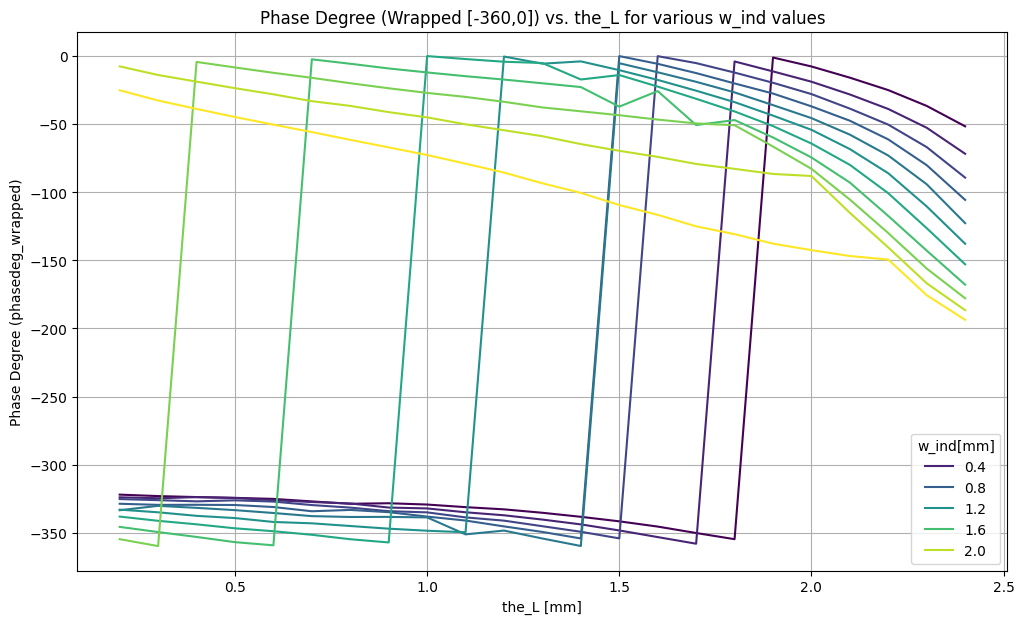

In [35]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='the_L[mm]', y='phasedeg_wrapped', data=phase_dat_sorted, hue='w_ind[mm]', palette='viridis')
plt.title('Phase Degree (Wrapped [-360,0]) vs. the_L for various w_ind values')
plt.xlabel('the_L [mm]')
plt.ylabel('Phase Degree (phasedeg_wrapped)')
plt.grid(True)
plt.legend(title='w_ind[mm]')
plt.show()

The plot above shows **phasedeg** wrapped into the range `[-360, 0]` versus **the_L [mm]**. This is useful if you want to keep the phase representation within a specific 360-degree cycle, even after the previous unwrapping process.


### Visualize Referenced Unit-Cell Design for Antenna Lens Design **at 38GHz**

In [16]:
import plotly.express as px

# Create an interactive line plot using Plotly Express for the wrapped phase
fig_interactive_wrapped = px.line(
    phase_dat_sorted,
    x='the_L[mm]',
    y='phasedeg_wrapped',
    color='w_ind[mm]',
    title='Interactive Phase Degree (Wrapped [-360,0]) vs. the_L for various w_ind values',
    labels={'the_L[mm]': 'the_L [mm]', 'phasedeg_wrapped': 'Phase Degree (phasedeg_wrapped)', 'w_ind[mm]': 'w_ind[mm]'}
)

# Update layout for better readability (optional)
fig_interactive_wrapped.update_layout(xaxis_title='the_L [mm]', yaxis_title='Phase Degree (phasedeg_wrapped)', legend_title='w_ind[mm]')

# Show the interactive plot
fig_interactive_wrapped.show()

Plot di atas sekarang menampilkan `phasedeg` yang telah di-wrap ke rentang `[-360, 0]` dalam format interaktif. Anda dapat berinteraksi dengan grafik ini untuk eksplorasi data yang lebih detail, seperti zooming, panning, dan melihat detail nilai dengan hover.

In [17]:
print("--- Data from phase_dat_sorted ---")
print("Unique w_ind[mm] in phase_dat_sorted:")
print(phase_dat_sorted['w_ind[mm]'].unique())
print(f"Range of w_ind[mm] in phase_dat_sorted: ({phase_dat_sorted['w_ind[mm]'].min()}, {phase_dat_sorted['w_ind[mm]'].max()})")
print("\nUnique the_L[mm] in phase_dat_sorted:")
print(phase_dat_sorted['the_L[mm]'].unique())
print(f"Range of the_L[mm] in phase_dat_sorted: ({phase_dat_sorted['the_L[mm]'].min()}, {phase_dat_sorted['the_L[mm]'].max()})")

print("\n--- Data from gain_dat ---")
print("Unique w_ind [mm] in gain_dat:")
print(gain_dat['w_ind [mm]'].unique())
print(f"Range of w_ind [mm] in gain_dat: ({gain_dat['w_ind [mm]'].min()}, {gain_dat['w_ind [mm]'].max()})")
print("\nUnique the_L [mm] in gain_dat:")
print(gain_dat['the_L [mm]'].unique())
print(f"Range of the_L [mm] in gain_dat: ({gain_dat['the_L [mm]'].min()}, {gain_dat['the_L [mm]'].max()})")

--- Data from phase_dat_sorted ---
Unique w_ind[mm] in phase_dat_sorted:
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2]
Range of w_ind[mm] in phase_dat_sorted: (0.2, 2.2)

Unique the_L[mm] in phase_dat_sorted:
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4]
Range of the_L[mm] in phase_dat_sorted: (0.2, 2.4)

--- Data from gain_dat ---
Unique w_ind [mm] in gain_dat:
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2]
Range of w_ind [mm] in gain_dat: (0.2, 2.2)

Unique the_L [mm] in gain_dat:
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4]
Range of the_L [mm] in gain_dat: (0.2, 2.4)


The output above shows the unique values and the minimum–maximum range for the `w_ind [mm]` and `the_L [mm]` columns from both DataFrames (`phase_dat_sorted` and `gain_dat`). You can compare this output directly to check whether there are any differences.


## Antenna Lens Design

First 10 unit cells:
{'index': 0, 'x_index': 0, 'y_index': 0, 'x_org_uc_mm': 0, 'y_org_uc_mm': 0, 'c_x_mm': 1.5, 'c_y_mm': 1.5, 'r_xy_mm': 40.30508652763321, 'phase_deg': 923.7838417242339}
{'index': 1, 'x_index': 1, 'y_index': 0, 'x_org_uc_mm': 3, 'y_org_uc_mm': 0, 'c_x_mm': 4.5, 'c_y_mm': 1.5, 'r_xy_mm': 38.242646351945886, 'phase_deg': 849.0006631742767}
{'index': 2, 'x_index': 2, 'y_index': 0, 'x_org_uc_mm': 6, 'y_org_uc_mm': 0, 'c_x_mm': 7.5, 'c_y_mm': 1.5, 'r_xy_mm': 36.31115531073061, 'phase_deg': 780.3434132126672}
{'index': 3, 'x_index': 3, 'y_index': 0, 'x_org_uc_mm': 9, 'y_org_uc_mm': 0, 'c_x_mm': 10.5, 'c_y_mm': 1.5, 'r_xy_mm': 34.532593299664015, 'phase_deg': 718.4166587283933}
{'index': 4, 'x_index': 4, 'y_index': 0, 'x_org_uc_mm': 12, 'y_org_uc_mm': 0, 'c_x_mm': 13.5, 'c_y_mm': 1.5, 'r_xy_mm': 32.931747600150224, 'phase_deg': 663.8356068911315}
{'index': 5, 'x_index': 5, 'y_index': 0, 'x_org_uc_mm': 15, 'y_org_uc_mm': 0, 'c_x_mm': 16.5, 'c_y_mm': 1.5, 'r_xy_mm': 31.53569

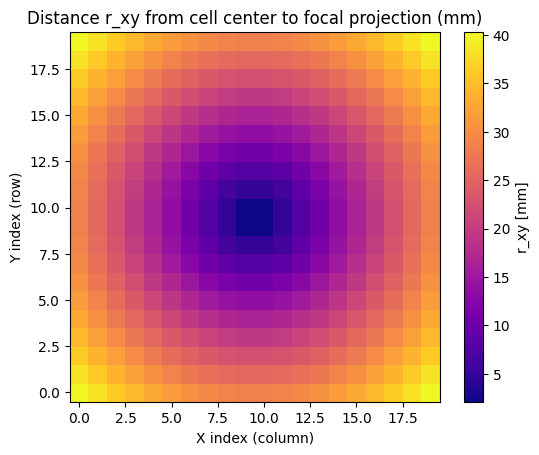

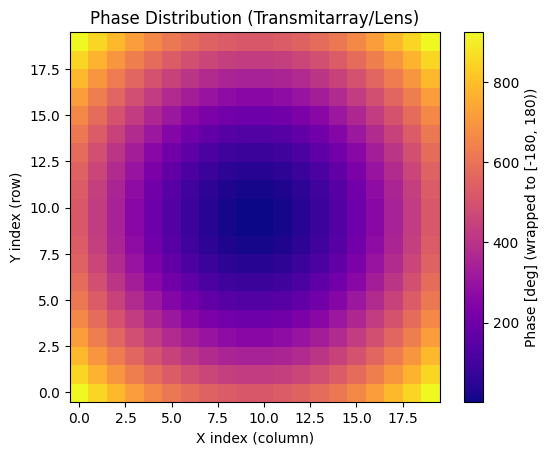

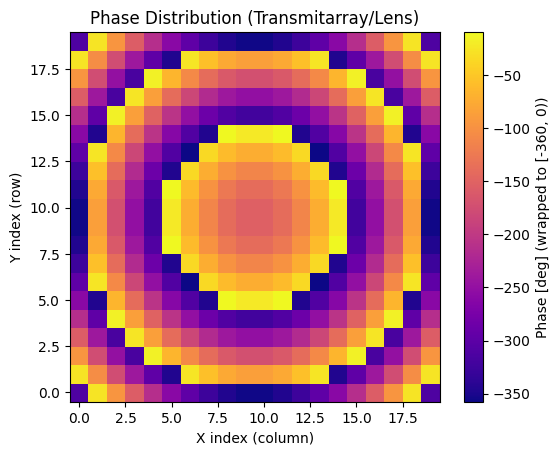

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG (all in mm, Hz)
# =========================
xlen_uc_mm = 3
ylen_uc_mm = 3

xnum_uc = 20
ynum_uc = 20

f0_hz = 38e9

# focal distance (mm)
foc_z_mm = 30 # NOTE: 1 cm = 10 mm

# Lens aperture size (mm)
aperture_x_mm = xnum_uc * xlen_uc_mm
aperture_y_mm = ynum_uc * ylen_uc_mm

# focal point position in XY (mm) -> center of aperture
foc_x_mm = aperture_x_mm / 2.0
foc_y_mm = aperture_y_mm / 2.0


# =========================
# HELPERS
# =========================
def wrap_deg_sym(deg: float) -> float:
    """Wrap phase to [-180, 180) degrees"""
    return (deg + 180.0) % 360.0 - 180.0

def wrap_deg_neg360_0(deg: float) -> float:
    """Wrap phase to [-360, 0) degrees"""
    return deg % 360.0 - 360.0

def lambda0_mm(f_hz: float) -> float:
    c = 299_792_458.0  # m/s
    return (c / f_hz) * 1000.0  # mm

def phase_from_r_mm(r_xy_mm: float, f_mm: float, f_hz: float, wrap=False, init_deg=0) -> float:
    """
    r_xy_mm: radial distance from cell center to focal projection on aperture plane (mm)
    f_mm: focal distance along z (mm)
    phase = k0 * (sqrt(r^2 + f^2) - f)
    """
    lam_mm = lambda0_mm(f_hz)
    k0 = 2.0 * math.pi / lam_mm  # rad/mm

    delta_L = math.sqrt(r_xy_mm**2 + f_mm**2) - f_mm  # mm
    phase_rad = k0 * delta_L
    phase_deg = math.degrees(phase_rad)+init_deg

    return wrap_deg_sym(phase_deg) if wrap else phase_deg
    # return phase_deg

def phase_from_r_mm_360(r_xy_mm: float, f_mm: float, f_hz: float, wrap=False, init_deg=0) -> float:
    """
    r_xy_mm: radial distance from cell center to focal projection on aperture plane (mm)
    f_mm: focal distance along z (mm)
    phase = k0 * (sqrt(r^2 + f^2) - f)
    """
    lam_mm = lambda0_mm(f_hz)
    k0 = 2.0 * math.pi / lam_mm  # rad/mm

    delta_L = math.sqrt(r_xy_mm**2 + f_mm**2) - f_mm  # mm
    phase_rad = k0 * delta_L
    phase_deg = math.degrees(phase_rad)+init_deg

    return wrap_deg_neg360_0(phase_deg) if wrap else phase_deg
    # return phase_deg


# =========================
# BUILD GRID
# =========================
phase_map = np.zeros((ynum_uc, xnum_uc), dtype=float)
phase_map_360 = np.zeros((ynum_uc, xnum_uc), dtype=float)
r_map = np.zeros((ynum_uc, xnum_uc), dtype=float)

unitcell_profile = []
idx = 0

for iy in range(ynum_uc):
    y_org = iy * ylen_uc_mm
    c_y = y_org + (ylen_uc_mm / 2.0)

    for ix in range(xnum_uc):
        x_org = ix * xlen_uc_mm
        c_x = x_org + (xlen_uc_mm / 2.0)

        r_xy = math.sqrt((foc_x_mm - c_x)**2 + (foc_y_mm - c_y)**2)
        ph_deg = phase_from_r_mm(r_xy, foc_z_mm, f0_hz, wrap=False,init_deg=0)
        ## Offset based on Unit cell-design
        ph_deg_360 = phase_from_r_mm_360(r_xy, foc_z_mm, f0_hz, wrap=True,init_deg=-516.039)

        r_map[iy, ix] = r_xy
        phase_map[iy, ix] = ph_deg
        phase_map_360[iy, ix] = ph_deg_360

        unitcell_profile.append({
            "index": idx,
            "x_index": ix,
            "y_index": iy,
            "x_org_uc_mm": x_org,
            "y_org_uc_mm": y_org,
            "c_x_mm": c_x,
            "c_y_mm": c_y,
            "r_xy_mm": r_xy,
            "phase_deg": ph_deg
        })
        idx += 1

# =========================
# OPTIONAL: print a few rows only (avoid spam)
# =========================
print("First 10 unit cells:")
for row in unitcell_profile[:10]:
    print(row)

print("\nCenter cell phase:", phase_map[ynum_uc//2, xnum_uc//2], "deg")
print("Corner cell phase:", phase_map[0, 0], "deg")


# =========================
# VISUALIZATION
# =========================
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(r_map, origin="lower", cmap="plasma")
cbar1 = fig1.colorbar(im1, ax=ax1)
cbar1.set_label("r_xy [mm]")
ax1.set_xlabel("X index (column)")
ax1.set_ylabel("Y index (row)")
ax1.set_title("Distance r_xy from cell center to focal projection (mm)")

fig2, ax2 = plt.subplots()
im2 = ax2.imshow(phase_map, origin="lower", cmap="plasma")
cbar2 = fig2.colorbar(im2, ax=ax2)
cbar2.set_label("Phase [deg] (wrapped to [-180, 180))")
ax2.set_xlabel("X index (column)")
ax2.set_ylabel("Y index (row)")
ax2.set_title("Phase Distribution (Transmitarray/Lens)")

fig2, ax2 = plt.subplots()
im2 = ax2.imshow(phase_map_360, origin="lower", cmap="plasma")
cbar2 = fig2.colorbar(im2, ax=ax2)
cbar2.set_label("Phase [deg] (wrapped to [-360, 0))")
ax2.set_xlabel("X index (column)")
ax2.set_ylabel("Y index (row)")
ax2.set_title("Phase Distribution (Transmitarray/Lens)")

plt.show()


### Target Design For Antenna-lens

In [41]:
import plotly.express as px

# Interactive plot for r_map
fig_r_map = px.imshow(r_map,
                      title='Interactive Distance r_xy from cell center to focal projection (mm)',
                      labels=dict(x='X index (column)', y='Y index (row)', color='r_xy [mm]'),
                      color_continuous_scale='plasma',
                      origin='lower')
fig_r_map.show()

# Interactive plot for phase_map (wrapped to [-180, 180))
fig_phase_map = px.imshow(phase_map,
                          title='Interactive Phase Distribution (Transmitarray/Lens) [-180, 180))',
                          labels=dict(x='X index (column)', y='Y index (row)', color='Phase [deg]'),
                          color_continuous_scale='plasma',
                          origin='lower')
fig_phase_map.show()

# Interactive plot for phase_map_360 (wrapped to [-360, 0))
fig_phase_map_360 = px.imshow(phase_map_360,
                               title='Interactive Phase Distribution (Transmitarray/Lens) [-360, 0))',
                               labels=dict(x='X index (column)', y='Y index (row)', color='Phase [deg]'),
                               color_continuous_scale='plasma',
                               origin='lower')
fig_phase_map_360.show()

Above are three interactive plots for **r_map**, **phase_map**, and **phase_map_360**. You can now interact with each plot (zoom, pan, hover) for more detailed data exploration.


In [20]:
# Prepare arrays to store matched parameters
matched_w_ind = np.zeros_like(phase_map_360, dtype=float)
matched_the_L = np.zeros_like(phase_map_360, dtype=float)

# Iterate through each cell in the phase map
for iy in range(phase_map_360.shape[0]):
    for ix in range(phase_map_360.shape[1]):
        target_phase = phase_map_360[iy, ix]

        # Calculate absolute difference with all available wrapped phases
        # Using .idxmin() will give the index of the row with the minimum difference
        closest_match_idx = (phase_dat_sorted['phasedeg_wrapped'] - target_phase).abs().idxmin()

        # Retrieve the w_ind and the_L values for the closest match
        matched_w_ind[iy, ix] = phase_dat_sorted.loc[closest_match_idx, 'w_ind[mm]']
        matched_the_L[iy, ix] = phase_dat_sorted.loc[closest_match_idx, 'the_L[mm]']

print("Matched w_ind for the first few cells:")
print(matched_w_ind[:5, :5])
print("\nMatched the_L for the first few cells:")
print(matched_the_L[:5, :5])

Matched w_ind for the first few cells:
[[0.2 1.8 1.  1.8 2.2]
 [1.8 1.8 2.2 2.2 0.2]
 [1.  2.2 2.2 0.2 0.2]
 [1.8 2.2 0.2 1.2 2. ]
 [2.2 0.2 0.2 2.  2.2]]

Matched the_L for the first few cells:
[[0.2 1.  2.3 2.3 2.4]
 [1.  2.1 2.3 2.4 0.2]
 [2.3 2.3 2.4 0.2 2.1]
 [2.3 2.4 0.2 1.7 1.9]
 [2.4 0.2 2.1 1.9 2.2]]


### Antenna Lens Design on Selected Unit-cell

In [21]:
import plotly.express as px

# Interactive plot for matched_w_ind
fig_w_ind = px.imshow(matched_w_ind,
                      title='Interactive Matched w_ind[mm] for each Unit Cell',
                      labels=dict(x='X index (column)', y='Y index (row)', color='w_ind[mm]'),
                      color_continuous_scale='viridis',
                      origin='lower')
fig_w_ind.show()

# Interactive plot for matched_the_L
fig_the_L = px.imshow(matched_the_L,
                      title='Interactive Matched the_L[mm] for each Unit Cell',
                      labels=dict(x='X index (column)', y='Y index (row)', color='the_L[mm]'),
                      color_continuous_scale='plasma',
                      origin='lower')
fig_the_L.show()

The interactive plot above shows the distribution of **w_ind [mm]** and **the_L [mm]** matched for each unit cell. This means that for each cell location on the lens, we have found the **w_ind** and **the_L** parameters from the **phase_dat_sorted** data that provide the closest phase to the computed target phase (**phase_map_360**). You can use this plot to analyze how these physical parameters should vary across the lens surface to achieve the desired beam forming.


In [22]:
# Prepare array to store matched phasedeg
matched_phasedeg = np.zeros_like(phase_map_360, dtype=float)

# Iterate through each cell in the phase map (reusing the logic for matching)
for iy in range(phase_map_360.shape[0]):
    for ix in range(phase_map_360.shape[1]):
        target_phase = phase_map_360[iy, ix]

        # Calculate absolute difference with all available wrapped phases
        closest_match_idx = (phase_dat_sorted['phasedeg_wrapped'] - target_phase).abs().idxmin()

        # Retrieve the phasedeg_wrapped value for the closest match
        matched_phasedeg[iy, ix] = phase_dat_sorted.loc[closest_match_idx, 'phasedeg_wrapped']

print("Matched phasedeg for the first few cells:")
print(matched_phasedeg[:5, :5])

Matched phasedeg for the first few cells:
[[-322.062   -27.0461  -94.1349 -156.039  -193.691 ]
 [ -27.0461 -105.366  -175.614  -193.691  -322.062 ]
 [ -94.1349 -175.614  -193.691  -322.062   -15.8553]
 [-156.039  -193.691  -322.062   -25.4192  -86.5557]
 [-193.691  -322.062   -15.8553  -86.5557 -149.431 ]]


### Phase-Deg Design on Designed Atnenna Lens

In [42]:
import plotly.express as px

# Interactive plot for matched_phasedeg
fig_phasedeg = px.imshow(matched_phasedeg,
                        title='Interactive Matched Phase Degree (phasedeg_wrapped) for each Unit Cell',
                        labels=dict(x='X index (column)', y='Y index (row)', color='Phase Degree [deg]'),
                        color_continuous_scale='viridis',
                        origin='lower')
fig_phasedeg.show()

The interactive plot above shows the distribution of `phasedeg_wrapped` matched for each unit cell. This is the actual phase value selected from `phase_dat_sorted` to achieve the target phase `phase_map_360`.


In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 3 columns for the matched parameters
fig_combined_matched = make_subplots(rows=1, cols=3,
                                     subplot_titles=(
                                         'Matched w_ind[mm]',
                                         'Matched the_L[mm]',
                                         'Matched Phase Degree (phasedeg_wrapped)'
                                     ))

# Add matched_w_ind plot
fig_combined_matched.add_trace(go.Heatmap(z=matched_w_ind, colorscale='viridis', colorbar_title='w_ind[mm]'), row=1, col=1)
fig_combined_matched.update_xaxes(title_text='X index (column)', row=1, col=1)
fig_combined_matched.update_yaxes(title_text='Y index (row)', row=1, col=1, autorange='reversed')

# Add matched_the_L plot
fig_combined_matched.add_trace(go.Heatmap(z=matched_the_L, colorscale='plasma', colorbar_title='the_L[mm]'), row=1, col=2)
fig_combined_matched.update_xaxes(title_text='X index (column)', row=1, col=2)
fig_combined_matched.update_yaxes(title_text='Y index (row)', row=1, col=2, autorange='reversed')

# Add matched_phasedeg plot
fig_combined_matched.add_trace(go.Heatmap(z=matched_phasedeg, colorscale='viridis', colorbar_title='Phase Degree [deg]'), row=1, col=3)
fig_combined_matched.update_xaxes(title_text='X index (column)', row=1, col=3)
fig_combined_matched.update_yaxes(title_text='Y index (row)', row=1, col=3, autorange='reversed')

# Update overall layout
fig_combined_matched.update_layout(height=400, width=1500, title_text='Combined Interactive Matched Parameters Maps')

fig_combined_matched.show()

Three interactive plots showing the distributions of **w_ind [mm]**, **the_L [mm]**, and **phasedeg_wrapped** that have been matched are now displayed in a single row with three columns. You can interact with each subplot separately for more detailed data exploration.


## Task
Calculate and visualize the shortest horizontal and vertical phase differences between adjacent unit cells in `matched_phasedeg` to ensure all differences are within the `[-180, 180]` range, and then analyze their maximum values.

### Calculate Shortest Horizontal Phase Differences

#### Subtask:
Calculate the shortest angular difference between horizontally adjacent cells in `matched_phasedeg`. This involves wrapping the differences to ensure they are within the `[-180, 180]` range before taking the absolute value.


**Reasoning**:
First, I will define the `wrap_deg_sym` function to wrap phase differences to the `[-180, 180)` range, as specified in the instructions.



In [28]:
import numpy as np

def wrap_deg_sym(deg: float) -> float:
    """Wrap phase to [-180, 180) degrees"""
    return (deg + 180.0) % 360.0 - 180.0

# Initialize an empty NumPy array for horizontal differences
horizontal_diffs = np.zeros((matched_phasedeg.shape[0], matched_phasedeg.shape[1] - 1), dtype=float)

# Iterate through each cell to calculate the shortest horizontal phase differences
for iy in range(matched_phasedeg.shape[0]):
    for ix in range(matched_phasedeg.shape[1] - 1):
        # Calculate the raw phase difference with its right neighbor
        raw_diff = matched_phasedeg[iy, ix + 1] - matched_phasedeg[iy, ix]

        # Apply the wrap_deg_sym function to get the shortest angular difference
        shortest_diff = wrap_deg_sym(raw_diff)

        # Store the absolute value of this shortest angular difference
        horizontal_diffs[iy, ix] = abs(shortest_diff)

print("Shortest horizontal phase differences for the first few rows and columns:")
print(horizontal_diffs[:5, :5])

Shortest horizontal phase differences for the first few rows and columns:
[[ 64.9841  67.0888  61.9041  37.652  128.371 ]
 [ 78.3199  70.248   18.077  128.371   23.6943]
 [ 81.4791  18.077  128.371   53.7933  50.5669]
 [ 37.652  128.371   63.3572  61.1365  54.0163]
 [128.371   53.7933  70.7004  62.8753  44.26  ]]


**Reasoning**:
Now that the horizontal phase differences have been calculated, the next logical step is to calculate the shortest vertical phase differences between adjacent unit cells in `matched_phasedeg`, following the same logic of wrapping differences to `[-180, 180)` range and taking the absolute value.



In [30]:
import numpy as np

# Initialize an empty NumPy array for vertical differences
vertical_diffs = np.zeros((matched_phasedeg.shape[0] - 1, matched_phasedeg.shape[1]), dtype=float)

# Iterate through each cell to calculate the shortest vertical phase differences
for ix in range(matched_phasedeg.shape[1]):
    for iy in range(matched_phasedeg.shape[0] - 1):
        # Calculate the raw phase difference with its bottom neighbor
        raw_diff = matched_phasedeg[iy + 1, ix] - matched_phasedeg[iy, ix]

        # Apply the wrap_deg_sym function to get the shortest angular difference
        shortest_diff = wrap_deg_sym(raw_diff)

        # Store the absolute value of this shortest angular difference
        vertical_diffs[iy, ix] = abs(shortest_diff)

print("Shortest vertical phase differences for the first few rows and columns:")
print(vertical_diffs[:5, :5])

Shortest vertical phase differences for the first few rows and columns:
[[ 64.9841  78.3199  81.4791  37.652  128.371 ]
 [ 67.0888  70.248   18.077  128.371   53.7933]
 [ 61.9041  18.077  128.371   63.3572  70.7004]
 [ 37.652  128.371   53.7933  61.1365  62.8753]
 [128.371   23.6943  50.5669  54.0163  44.26  ]]


**Reasoning**:
With both horizontal and vertical phase differences calculated, the next logical step is to visualize these differences using interactive heatmaps to better understand their spatial distribution across the unit cell array.



In [32]:
import plotly.express as px

# Interactive plot for horizontal_diffs
fig_horizontal_diffs = px.imshow(horizontal_diffs,
                                 title='Interactive Absolute Shortest Horizontal Phase Differences [deg]',
                                 labels=dict(x='X index (column)', y='Y index (row)', color='Phase Difference [deg]'),
                                 color_continuous_scale='viridis',
                                 origin='lower')
fig_horizontal_diffs.show()

# Interactive plot for vertical_diffs
fig_vertical_diffs = px.imshow(vertical_diffs,
                               title='Interactive Absolute Shortest Vertical Phase Differences [deg]',
                               labels=dict(x='X index (column)', y='Y index (row)', color='Phase Difference [deg]'),
                               color_continuous_scale='plasma',
                               origin='lower')
fig_vertical_diffs.show()

**Reasoning**:
After visualizing the phase differences, it's important to quantify their maximum values to understand the largest differences present in the array. This addresses the final part of the subtask: 'analyze their maximum values'.



In [33]:
max_horizontal_diff = np.max(horizontal_diffs)
max_vertical_diff = np.max(vertical_diffs)

print(f"Maximum absolute shortest horizontal phase difference: {max_horizontal_diff:.2f} deg")
print(f"Maximum absolute shortest vertical phase difference: {max_vertical_diff:.2f} deg")

Maximum absolute shortest horizontal phase difference: 128.37 deg
Maximum absolute shortest vertical phase difference: 128.37 deg


### Final Task

#### Subtask:
Summarize the analysis of shortest phase differences and confirm that all differences are within the desired range.


### Summary:

#### Q&A
The task asked to confirm that all differences are within the desired `[-180, 180]` range. Yes, the `wrap_deg_sym` function was applied to ensure that all calculated phase differences are within the `[-180, 180)` range. Subsequently, the absolute values of these shortest differences were taken for analysis and visualization, meaning they are within `[0, 180)`.

#### Data Analysis Key Findings
*   A `wrap_deg_sym` function was successfully implemented to ensure all phase differences are within the `[-180, 180)` degree range.
*   The absolute shortest horizontal phase differences were calculated across the dataset. The maximum absolute shortest horizontal phase difference observed was `128.37` degrees.
*   The absolute shortest vertical phase differences were calculated across the dataset. The maximum absolute shortest vertical phase difference observed was `128.37` degrees.
*   Both horizontal and vertical phase differences were visualized using interactive heatmaps, allowing for a detailed inspection of their distributions.

#### Insights or Next Steps
*   Since the maximum absolute phase difference is `128.37` degrees, which is well within the `[0, 180)` range, it indicates that the phase unwrapping or measurement process was successful in avoiding jumps greater than half a cycle ($180$ degrees).
*   Further analysis could involve investigating the spatial distribution of the larger phase differences (e.g., those above $100$ degrees) to identify potential areas of higher phase change or noise within the `matched_phasedeg` data.
